## Tensor
在Pytorch中，Tensor(张量)属于一种数据结构，他可以是一个标量，一个向量，一个矩阵，甚至是更高维的数组，因此Pytorch中的Tensor和Numpy中的数组非常相似，但是Tensor可以在GPU上加速运算。

同时应该注意的是，在Pytorc的0.4版本之前，Tensor是不能计算梯度的，因此需要Variable来包装Tensor，但是在0.4版本之后，Variable和Tensor合并了，Tensor可以直接计算梯度了。

下面介绍一下Tensor的基本使用：


### 数据类型
torch 在CPU和GPU中 Tensor分别有8中数据类型，主要包括以下：
1. torch.float32 或 torch.float：32位浮点数
2. torch.float64 或 torch.double：64位双精度浮点数
3. torch.float16 或 torch.half：16位半精度浮点数
4. torch.int8：8位整数（有符号）
5. torch.uint8：8位整数（无符号）
6. torch.int16 或 torch.short：16位整数（有符号）
7. torch.int32 或 torch.int：32位整数（有符号）
8. torch.int64 或 torch.long：64位整数（有符号）

注意：在 GPU 上，不是所有的数据类型都被支持。例如，torch.int8 和 torch.uint8 在 GPU 上可能不被支持。

In [ ]:
# 导入需要的库
import torch
# 获得Tensor的数据类型
torch.tensor([1.2,3.4]).dtype

In [ ]:
# 更改默认数据类型
torch.set_default_dtype(torch.float64)

# 获得Tensor的数据类型
torch.tensor([1.2,3.4]).dtype

### 生成Tensor

在Pytorch中，有多种方式可以生成一个Tensor，下面使用具体代码介绍如何使用pytorch生成tensor:
1. `torch.tensor()`: 将python的列表转换为tensor
2. `torch.Tensor()`: 将python的列表转换为tensor;或者生成指定形状的tensor
3. `torch.**_like()`: 生成与指定tensor维度相同、性质相似的tensor
4. `torch.numpy() 和torch.from_numpy()`: 将numpy的ndarray转换为tensor
5. `troch.normal()/torch.rand()/torch.randn()`: 生成具有特定分布的随机数
6. `torch.randperm(n)`: 生成0-n之间整数进行随机排序的tensor
7. `torch.arange(start, end, step)`: 生成指定范围内的整数tensor
8. `torch.linspace(start, end, steps)`: 生成指定范围内等间隔的tensor
9. `torch.logspace(start, end, steps)`: 生成指定范围内等比数的tensor
10. `troch.ones()/torch.zeros()/torch.empty()/torch.eye()`: 生成全为1/0/随机数/单位矩阵的tensor

In [ ]:
# 使用torch.tensor()创建Tensor
A = torch.tensor([1.2,3.4])

# 使用dtype指定tensor的数据类型
# 使用requires_grad指定是否需要梯度
A = torch.tensor([1.2,3.4],dtype=torch.float32,requires_grad=True)

#注意，只有浮点类型的tensor才能指定是否需要梯度
A

In [ ]:
# 使用torch.Tensor() 创建Tensor
B = torch.Tensor([1.2,3.4])

# 创建一个 Tensor，形状为 [3, 3]
B = torch.Tensor(3, 3)

In [ ]:
# 创建一个与B相同大小，全为1的tensor
C = torch.ones_like(B)

# 创建一个与B相同大小，全为0的tensor
D = torch.zeros_like(B)

# 创建一个与B相同大小的随机tensor
E = torch.rand_like(B)

In [ ]:
# 利用numpy生成张量
import numpy as np
F = np.array([[1,2,3],[4,5,6]])
G = torch.from_numpy(F)

In [ ]:
# 使用torch.numpy()转化Numpy数组
H = G.numpy()

In [ ]:
# 使用指定均值和方差生成随机数
torch.manual_seed(0)
I = torch.normal(mean=torch.full([10],0),std=torch.arange(1,0,-0.1))

In [ ]:
# 使用torch.rand() 在区间[0, 1]内生成一服从均匀分布的随机数。
torch.manual_seed(0)
J = torch.rand(3,4)

In [ ]:
# 使用torch.rand_like() 生成与其他维度相同的随机数。
torch.manual_seed(0)
K = torch.rand_like(B)

In [ ]:
# 使用torch.randn()生成服从标准正态分布的随机数。
torch.manual_seed(0)
L = torch.randn(3,4)
M= torch.randn_like(B)

In [ ]:
# torch.randperm(n) 生成一个从 0 到 n-1 的随机排列。
torch.manual_seed(0)
N = torch.randperm(10)

In [ ]:
# torch.arange() 生成一个给定范围内的连续整数张量。参数：起始值、结束值和步长
O = torch.arange(0,10)

In [ ]:
# torch.linspace() 生成给定范围内的等间隔整数或浮点数张量
P = torch.linspace(0,10,steps=5)

In [ ]:
# torch.logspace() 生成给定范围内的以对数间隔整数或浮点数张量
Q = torch.logspace(0,-1,steps=10)

In [ ]:
# torch.eye() 生成单位矩阵
R = torch.eye(3)
# torch.zeros()   生成全0的张量
S = torch.zeros(3,3)
# torch.ones() 生成全1的张量
T = torch.ones(3,3) 
# torch.full() 生成全为某个值的张量
U = torch.full((3,3), 5)

### Tensor 操作
对于Tensor的操作，主要是改变Tensor的形状、提取Tensor元素、统计Tensor信息等

改变tensor形状的操作主要包括以下几种：
1. `reshape()`: 返回具有相同数据但大小不同的 tensor,原始tensor 和 新的tensor 共享内存
2. `resize_()`: 返回相同数据的 tensor，但形状已经改变。与 `reshape()` 不同，此函数可以改变 tensor 的大小。
3. `resize_as_()`: 返回相同数据的 tensor，形状与另一个 tensor 相同。
4. `view()`: 返回具有相同数据但大小不同的 tensor,要求原始tensor必须连续，或者使用 `contiguous()` 函数将其转换为连续的 tensor。
5. `permute()`: 用来交换 tensor 的维度。
6. `squeeze()`: 返回一个具有相同数据但所有维度为1的维度都被移除的 tensor。
7. `unsqueeze()`: 返回一个具有相同数据但在指定位置添加一个维度的 tensor。
8. `expand()`: 将tensor广播到指定形状。
9. `expand_as()`: 返回一个具有相同数据但形状与另一个 tensor 相同的 tensor。
10. `repeat()`: 根据指定形状进行重复填充，接受整数元组，表示沿每个轴重复的次数

In [ ]:
# 创建一个形状为 [2, 2] 的 tensor
A = torch.tensor([[1, 2], [3, 4]])

# 使用 reshape 改变 tensor 的形状
B = A.reshape(4, 1)

# 使用 view 改变 tensor 的形状
C = A.view(4, 1)

# 使用 permute 改变 tensor 的维度
D = A.permute(1, 0)

# 使用 squeeze 移除 tensor 的所有维度为1的维度
E = A.squeeze()

# 使用 unsqueeze 在指定位置添加一个维度
F = A.unsqueeze(0)

# 使用 expand 在指定位置添加一个维度
G = A.expand(3, 2, 2)

# 使用 repeat 重复 tensor 中的元素
H = A.repeat(3, 2)


获取tensor中元素的操作主要包括以下几种：
1. 切片
2. 索引
3. `torch.tril()、torch.triu()、torch.diag()` 分别获取tensor的下三角元素、上三角元素、对角线元素

In [ ]:
# 创建一个形状为 [2, 2] 的 tensor
A = torch.tensor([[1, 2], [3, 4]])  

# 使用切片获得A中元素
B = A[0, 0]

# 使用索引获取A中元素
C = A[A>2] 

# 使用 torch.where() 获取A中元素
D = torch.where(A>2, A, torch.full_like(A, 0))

# 使用 torch.tril() 获取A的下三角矩阵
E = torch.tril(A)

# 使用 torch.triu() 获取A的上三角矩阵
F = torch.triu(A)   

# 使用 torch.diag() 获取A的对角线元素
G = torch.diag(A) 

tensor的拼接和拆分包括以下几种操作
1. `torch.cat()` 将多个tensor在指定维度上进行拼接，不会增加维度
2. `torch.stack()` 将多个tensor在指定维度拼接，但是会增加维度
3. `torch.chunk()` 将tensor 分割为特定数量的块
4. `torch.split()` 将tensor分割成多个子tensor

In [ ]:
# 创建一个tensor
A = torch.tensor([[1, 2], [3, 4]])
B = torch.tensor([[5, 6], [7, 8]])

# 使用cat() 连接A，B
C = torch.cat([A, B], dim=1)
D = torch.cat([A, B], dim=0)

# 使用stack() 在新维度上连接A，B
E = torch.stack([A, B], dim=0)
F = torch.stack([A, B], dim=1)

# 使用chunk() 将C分割成两个张量
G = torch.chunk(C, 2, dim=1)

# 使split() 将C分割成两个张量
H = torch.split(C, [1,1,2], dim=1)

tensor 的计算主要包括大小比较、元素的基本运算、排序与最值等方法。

**大小比较**
1. `torch.eq()` : 逐元素比较是否相等
2. `torch.ge()` : 逐元素比较是否大于等于
3. `torch.gt()` : 逐元素比较是否大于
4. `torch.le()` : 逐元素比较是否小于等于
5. `troch.lt()` : 逐元素比较是否小于
6. `torch.ne()` : 逐元素比较是否不相等
7. `torch.equal()` : 比较两个tensor是否具有相同的大小和元素

In [25]:
# 创建一个tensor
A = torch.tensor([1, 2,3, 4])
B = torch.arange(1, 5)

# 返回值为mask
torch.eq(A, B)

# 返回值为True 或者 False
torch.equal(A, B)

(tensor([True, True, True, True]), True)

**基本运算**
1. `torch.add()` 矩阵逐元素相加
2. `torch.sub()` 矩阵逐元素相减
3. `torch.mul()` 矩阵逐元素相乘
4. `torch.div()` 矩阵逐元素相除
5. `torch.pow()` 矩阵的幂
6. `torch.sqrt()` 矩阵的平方根
7. `troch.exp()` 矩阵的指数
8. `torch.log()` 矩阵的对数
9. `torch.log10()` 矩阵的常用对数
10. `torch.clamp` 限制矩阵元素在指定范围内
11. `torch.clamp_max()` 根据最大值裁切
12. `torch.clamp_min()` 根据最小值裁切
13. `torch.t()` 矩阵转置
14. `torch.mm()` 矩阵乘法
15. `torch.inverse()` 求逆
16. `torch.trace() ` 求迹

In [ ]:

A = torch.arange(6.0).reshape(2,3)
B = torch.linspace(10, 20, 6).reshape(2,3)

# 矩阵逐个元素相乘
C = A * B

# 矩阵逐个元素相除
D = A / B

# 矩阵逐个元素相加
E = A + B

# 矩阵逐个元素相减
F = A - B

# 矩阵逐个元素求幂
G = A ** 2

# 矩阵逐个元素求指数
H = torch.exp(A)

# 矩阵逐个元素求对数
I = torch.log(A)

# 矩阵逐个元素求平方根
J = torch.sqrt(A)

# 矩阵裁切
K = A.clamp(0, 2)

# 矩阵最小值裁切
L = A.clamp_min(2)

# 矩阵最大值裁切
M = A.clamp_max(2)

# 矩阵转置
N = A.t()

# 矩阵相乘
O = A @ B.t()

P = torch.mm(A, B.t())


统计tensor中元素主要包括以下方法：

1. `torch.sum()`: 计算 Tensor 中所有元素的和。
2. `torch.mean()`: 计算 Tensor 中所有元素的平均值。
3. `torch.max()`: 返回 Tensor 中的最大值。
4. `torch.min()`: 返回 Tensor 中的最小值。
5. `torch.prod()`: 计算 Tensor 中所有元素的乘积。
6. `torch.std()`: 计算 Tensor 中所有元素的标准差。
7. `torch.var()`: 计算 Tensor 中所有元素的方差。
8. `torch.median()`: 返回 Tensor 中的中位数。
9. `torch.mode()`: 返回 Tensor 中的众数。
10. `torch.norm()`: 计算 Tensor 的范数。
11. `torch.argmax()`: 返回 Tensor 中最大值的索引。
12. `torch.argmin()`: 返回 Tensor 中最小值的索引。
13. `torch.sort()`: 对 Tensor 进行排序并返回排序后的 Tensor以及索引index。
14. `torch.topk()`: 返回 Tensor 中 k 个最大值的元素及其索引。
15. `torch.kthvalue()`: 返回 Tensor 中第 k 个最小值的元素及其索引。

In [ ]:
A = torch.tensor([18,34,66,3,34,54,23,46,56,90], dtype=torch.float32)

# 求和
B = torch.sum(A)

# 求均值
C = torch.mean(A)

# 求最大值
D = torch.max(A)

# 求最小值
E = torch.min(A)

# 求标准差
F = torch.std(A)

# 求乘积
G = torch.prod(A)

# 求范数
H = torch.norm(A)

# 最大值索引
I = torch.argmax(A)

# 最小值索引
J = torch.argmin(A) 

# 排序
K = torch.sort(A)

# topk
L = torch.topk(A, 3)

# kthvalue
M = torch.kthvalue(A, 3)

## 自动微分

针对tensor，设置其`requires_grad = True`，可以通过相关计算输出其在传播过程中的梯度（导数）信息。
其中注意一点：tensor的更新方向，如果需要求得函数的最小值，应该使用减号，即`x -= learning_rate * x.grad`

In [ ]:
# 使用pytorch的自动微分求函数最小值：

# 初始化变量x
x = torch.tensor([9.], requires_grad=True)

# 定义函数f(x)
def f(x):
    return x ** 2 + 2 * x + 1

# 梯度下降
learning_rate = 0.2
for i in range(10):
    # 计算函数值和梯度
    y = f(x)
    y.backward()
    
    # 使用梯度来更新x
    with torch.no_grad(): # 使用torch.no_grad()来防止跟踪历史记录
        x -= learning_rate * x.grad
    # 清空梯度
    x.grad.zero_()

# 输出最小值
print(f'函数的最小值为：{y.item()}')

## torch.nn 模块
torch.nn模块中主要包括卷积层、池化层、激活函数层、循环层、全连接层等相关使用方法

### 卷积层
使用卷积可以达到稀疏连接、参数共享、平移不变性等特点。

常见的卷积操作对应类如下：（以2d为例）
1. `torch.nn.Conv2d`
2. `torch.nn.ConvTranspose2d()`

`torch.nn.Conv2d`其参数说明如下：
~~~python
torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros')
~~~

`in_channels`（int）：输入图像的通道数。
`out_channels`（int）：卷积产生的通道数。
`kernel_size`（int or tuple）：卷积核的尺寸，可以是一个int（例如，3表示3x3）或者一个tuple（例如，(3, 3)）。
`stride`（int or tuple，optional）：卷积步长，即卷积核移动的步数。默认为1。
`padding`（int or tuple，optional）：输入的每一条边补充0的层数。默认为0。
`dilation`（int or tuple，optional）：卷积核元素之间的间距。默认为1。
`groups`（int，optional）：从输入通道到输出通道的阻塞连接的数目。默认为1。
`bias`（bool，optional）：如果设置为False，那么这个层不会学习附加的偏置参数。默认为True。
`padding_mode`（string，optional）：指定填充模式。可以是'zeros'、'reflect'、'replicate'或'circular'。默认为'zeros'。

卷积前后尺寸变化如下：
output_height = (input_height + 2 * padding_height - dilation_height * (kernel_height - 1) - 1) / stride_height + 1

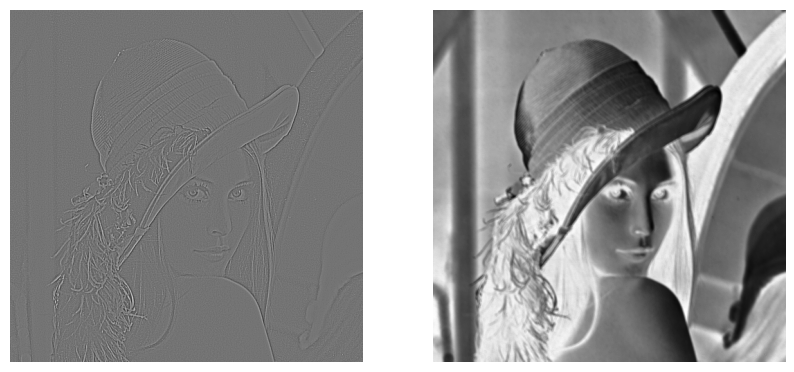

In [32]:
import torch
import torch.nn as nn
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 载入图像
image_path = "imgs\LenaRGB.bmp"
image = Image.open(image_path)
imgray = np.array(image.convert('L'),dtype=np.float32)

# 将array转换为tensor
imh,imw = imgray.shape
imgray_t = torch.from_numpy(imgray.reshape((1,1,imh,imw)))

## 对灰度图像进行卷积提取图像轮廓
# 定义边缘检测卷积核，[batch_size, in_channels, height, width]
kernel = torch.tensor([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]],dtype=torch.float32).reshape((1,1,3,3))

# 定义卷积层
conv2d = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3, bias=False)
# 卷积的第一个核使用边缘检测核，第二个核随机初始化
conv2d.weight.data[0] = kernel

imout = conv2d(imgray_t)
# 对卷积输出进行维度压缩
imout_data = imout.data.squeeze()
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(imout_data[0],cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(imout_data[1],cmap='gray')
plt.axis('off')
plt.show()

### 池化层

池化操作主要是对卷积后的图像进行降低维度、增大感受野的效果，通过平均池化或者全局池化等操作可以保留数据的主要特征。
常见的池化操作对应类如下：(以2d为例)
1. `torch.nn.MaxPool2d`
2. `torch.nn.MaxUnpool2d`
3. `torch.nn.AvgPool2d`
4. `torch.nn.AdaptiveMaxPool2d()`
5. `torch.nn.AdaptiveAvgPool2d()`
6. `torch.nn.LPPoool2d()`

torch.nn.MaxPool2d()输入为(N，Ci，Hi，Wi)的tensor，输出为(N,Co,Ho,Wo),其中
Ho = (Hi-kernel_size)/stride + 1
Wo = (Wi-kernel_size)/stride + 1

`torch.nn.MaxPool2d()`函数的参数如下：

```python
torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
```

`kernel_size`（int或tuple）：最大池化操作的窗口大小。可以是一个整数（例如，2表示2x2的窗口大小）或者一个元组（例如，(2, 2)）。
`stride`（int或tuple，可选）：窗口移动的步长。默认值是`kernel_size`。
`padding`（int或tuple，可选）：在输入的每一条边补充0的层数。默认为0。
`dilation`（int或tuple，可选）：控制窗口中元素的间距。默认为1。
`return_indices`（bool，可选）：如果为True，会返回输出最大值的索引，通常用于`torch.nn.MaxUnpool2d`。默认为False。
`ceil_mode`（bool，可选）：如果为True，会使用向上取整的方式计算输出的形状。默认为False。

In [ ]:
# 定义最大池化层
maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

# 定义平均池化层
avgpool = nn.AvgPool2d(kernel_size=2, stride=2)

# 定义自适应池化层 output_size为输出的大小
adapool = nn.AdaptiveAvgPool2d(output_size=(100,100))

poolout = adapool(imout)
poolout_data = poolout.squeeze().detach()
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(poolout_data[0],cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(poolout_data[1],cmap='gray')
plt.axis('off')
plt.show()

### 激活函数
激活函数主要包括以下几类：

1. `torch.nn.ReLU()`:   $f(x) = max(0,x)$
2. `torch.nn.Sigmoid()`: $ f(x) = \frac{1}{1+e^{-x}}$
3. `torch.nn.Tanh()`: $ f(x) = \tanh(x) = \frac{\sinh x}{\cosh x} = \frac{e^x - e^{-x}}{e^x + e^{-x}} = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}$
4. `torch.nn.Softmax()`: $ f(x) = \frac{\exp(x_i)}{\sum_j \exp(x_j)} $
5. `torch.nn.LeakyReLU()`: $ f(x) = \max(0.01x,x) $

In [ ]:
x = torch.linspace(-5, 5, 100)

sigmoid = nn.Sigmoid()
y_sigmoid = sigmoid(x)

tanh = nn.Tanh()
y_tanh = tanh(x)

relu = nn.ReLU()
y_relu = relu(x)

softmax = nn.Softmax(dim=0)
y_softmax = softmax(x)

lrelu = nn.LeakyReLU()
y_lrelu = lrelu(x)

plt.figure(figsize=(25,5))
plt.subplot(151)
plt.plot(x.data.numpy(), y_sigmoid.data.numpy(),"r-")
plt.title("Sigmoid")
plt.grid()
plt.subplot(152)
plt.plot(x.data.numpy(), y_tanh.data.numpy(),"r-")
plt.title("Tanh")
plt.grid()
plt.subplot(153)
plt.plot(x.data.numpy(), y_relu.data.numpy(),"r-")
plt.title("ReLU")
plt.grid()
plt.subplot(154)
plt.plot(x.data.numpy(), y_softmax.data.numpy(),"r-")
plt.title("Softmax")
plt.grid()
plt.subplot(155)
plt.plot(x.data.numpy(), y_lrelu.data.numpy(),"r-")
plt.title("LeakyReLU")
plt.grid()
plt.show()

### 循环层
pytorch 中主要实现了以下三种循环层，
1. `nn.RNN()` 多层RNN单元
2. `nn.LSTM()` 多层LSTM单元
3. `nn.GRU()` 多层GRU单元

后续将详细介绍。

### 全连接层
通常所说的全连接层指的是由多个神经网络组成的层，其所有输出和该层的所有输入都有连接，即每个输入都会影响到每一个输出。在Pytorch中，`nn.Linear()`函数表示线性变换，加上激活函数就可以构成全连接层。

`nn.Linear(in_features, out_features，biased=True)`

参数：
`in_features`: 输入的维度
`out_features`: 输出的维度
`biased`: 是否使用偏置项，默认为True

全连接层的应用范围非常广泛，只有全连接层组成的网络是全连接神经网络，可以用来数据分类或者回归预测;CNN或者RNN的末端通常也会由全连接层组成

## 数据操作与预处理
在pytorch中，需要对于文本、图像或者高维数据进行操作和预处理，其中`torch.utils.data`提供了基本的数据操作和预处理方法。

### 高维数组

一般情况下，我们需要从文本中读取高维的数据，这种数据主要由特征（多个预测变量）和 标签（被预测变量）组成。特征一般是数值变量或者离散变量，标签如果是连续的数值，则对应回归问题；如果是离散的数值，则对应分类问题。

#### 回归数据准备

In [ ]:
import torch
import torch.utils.data as Data
from sklearn.datasets import load_iris,fetch_openml
import numpy as np

# 读取Boston数据集,读取进来的可能是numpy数组或者DataFrame
boston = fetch_openml(name='boston', version=1, as_frame=True)
boston_X, boston_y = boston.data, boston.target

# 将数据集转换为torch 的32位浮点数
train_X = torch.from_numpy(boston_X.values.astype(np.float32))
train_y = torch.from_numpy(boston_y.values.astype(np.float32))

# 将数据集包装成TensorDataset，以方便后续操作
dataset = Data.TensorDataset(train_X, train_y)

# 定义一个数据加载器，将训练数据进行批量处理
train_loader = Data.DataLoader(
    dataset=dataset,      # torch TensorDataset format
    batch_size=32,      # 批处理样本大小
    shuffle=True,       # 是否随机打乱数据
    num_workers=0,      # 读取数据的线程数量,默认为0
)

# 检查数据集的一个batch样本维度是否一致
for step, (batch_x, batch_y) in enumerate(train_loader):
    print(f"step:{step},batch_x:{batch_x.shape},batch_y:{batch_y.shape}")

#### 分类数据集准备
与上述不同的是，分类数据集标签默认为64位有符号的整形数据

In [ ]:
# 读取Iris数据集
iris_X, iris_y = load_iris(return_X_y=True)

# 将读取数据转换为张量
train_X = torch.from_numpy(iris_X.astype(np.float32))
train_y = torch.from_numpy(iris_y.astype(np.int64))

# 将数据集包装成TensorDataset，以方便后续操作
dataset = Data.TensorDataset(train_X, train_y)

# 定义一个数据加载器，将训练数据进行批量处理
train_loader = Data.DataLoader(
    dataset=dataset,      # torch TensorDataset format
    batch_size=32,      # 批处理样本大小
    shuffle=True,       # 是否随机打乱数据
    num_workers=0,      # 读取数据的线程数量,默认为0
)

# 检查数据集的一个batch样本维度是否一致
for step, (batch_x, batch_y) in enumerate(train_loader):
    print(f"step:{step},batch_x:{batch_x.shape,batch_x.dtype},batch_y:{batch_y.shape,batch_y.dtype}")

## 图像数据

图像数据中，torchvision 中的transform 模块提供了对每张图片的预处理操作，包括以下：
`torchvision.transforms`模块提供了许多预处理图像的方法，包括：

1. `Resize()` 调整图像大小
2. `CenterCrop()` 从图像中心位置裁剪图像
3. `RandomCrop()` 从图像中随机裁剪指定大小的图像
4. `RandomHorizontalFlip()` 随机水平翻转图像
5. `RandomVerticalFlip()` 随机垂直翻转图像
6. `RandomRotation()` 随机旋转图像
7. `RandomAffine()` 随机仿射变换
8. `ColorJitter()` 随机调整图像亮度、对比度、饱和度和色相
9. `RandomGrayscale()` 随机将图像转换为灰度图
10. `Normalize()` 对图像进行归一化
11. `ToTensor()` 将图像转换为Tensor。具体来讲，将取值为[0,255]的图像转换为取值范围为[0,1]的Tensor,并转换通道顺序从HWC到CHW。
12. `Compose()` 将多个预处理操作组合在一起，按顺序执行。

### 从datasets模块中导入数据集并且预处理

以导入FashionMNIST数据集为例，该数据集包括60000张28X28的图像作为训练集，10000张28X28的灰度图像作为测试集，数据共有10类。

In [ ]:
import torch
import torch.utils.data as Data
from torchvision.datasets import FashionMNIST
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

# FashionMNIST 准备训练集
train_data = FashionMNIST(
    root='./data/FashionMNIST',  # 数据集存放路径
    train=True,  # 是否作为训练集数据
    download=True,  # 是否从网络下载数据集
    transform=transforms.ToTensor()  # 数据集是否需要转换
)

# 定义一个数据加载器
train_loader = Data.DataLoader(
    dataset=train_data,  # 数据集
    batch_size=32,  # 批处理样本大小
    shuffle=True,  # 是否随机打乱数据
    num_workers=0  # 读取数据的线程数量,默认为0
)
print(len(train_loader))

In [ ]:
# 对测试集进行相同的操作
test_data = FashionMNIST(
    root='./data/FashionMNIST', # 数据路径
    train=False,
    download=False, # 已经下载过了，不需要再下载
    transform=transforms.ToTensor()
)

# 获得每个图像的数据
test_x = test_data.data.type(torch.FloatTensor)/255.

# 获得每个图像的标签
test_y = test_data.targets

# 检查数据和标签的维度
print(test_x.shape, test_y.shape)

# 文件夹导入数据并预处理

猫狗数据集下载地址：https://www.kaggle.com/datasets/tongpython/cat-and-dog?resource=download

文件夹结构如下：

```
data/
  mydata/
    training_set/
      cat/
        cat01.jpg
        cat02.jpg
        ...
      dog/
        dog01.jpg
        dog02.jpg
        ...
    test_set/
```

In [ ]:
# 定义预处理方式
transform = transforms.Compose([
    transforms.Resize([224,224]), # 缩放到224像素大小
    transforms.ToTensor(), # 转换为Tensor
    transforms.Normalize(mean=[0.5], std=[0.5]) # 标准化
])

# 读取数据集,
#`ImageFolder`会自动根据子目录的名称生成类别标签，子目录的名称就是类别的名称，子目录中的所有图像都被认为是该类别的。
# 例如，如果你有一个名为'cats'的子目录和一个名为'dogs'的子目录，那么`ImageFolder`会生成两个类别：'cats'和'dogs'，
# 并且将'cats'目录中的所有图像标记为类别'cats'，将'dogs'目录中的所有图像标记为类别'dogs'。
train_data = ImageFolder(root='./data/mydata/training_set', transform=transform)

# 定义一个数据加载器
train_data_loader = Data.DataLoader(
    dataset=train_data,  # 数据集
    batch_size=4,  # 批处理样本大小
    shuffle=True,  # 是否随机打乱数据
    num_workers=0  # 读取数据的线程数量,默认为0
)

# 获得一个batch的数据
for step, (batch_x, batch_y) in enumerate(train_data_loader):
    print(f"step:{step},batch_x:{batch_x.shape},batch_y:{batch_y.shape}")
    if step > 1:
        break

# 输出训练图像的尺寸和标签
print(batch_x.shape, batch_y.shape)